## Detecção de doenças cardíacas em Python - Projeto de aprendizado de máquina



https://www.youtube.com/watch?v=r5FJnv32sM8



In [42]:
import pandas as pd

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [43]:
from sklearn.model_selection import train_test_split


X,y = df.drop('target', axis=1), df['target']

#40% será teste 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=9 )

In [44]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
741,41,0,2,112,268,0,0,172,1,0.0,2,0,2
145,40,1,0,110,167,0,0,114,1,2.0,1,0,3
289,40,1,0,152,223,0,1,181,0,0.0,2,0,3
955,62,1,2,130,231,0,1,146,0,1.8,1,3,3
506,61,1,0,120,260,0,1,140,1,3.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,67,1,0,160,286,0,0,108,1,1.5,1,3,2
501,35,0,0,138,183,0,1,182,0,1.4,2,0,2
638,65,1,3,138,282,1,0,174,0,1.4,1,1,2
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3


In [45]:
y_test

80     0
441    0
2      0
128    1
451    1
      ..
574    0
373    0
165    0
954    1
849    0
Name: target, Length: 410, dtype: int64

# Scale-Insensitive



In [46]:

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 9)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

In [47]:

from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)



GaussianNB()

In [48]:

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()


# Scale-Sensitive

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [51]:
from sklearn.linear_model  import LogisticRegression

log = LogisticRegression()

log.fit(X_train_scaled, y_train)


LogisticRegression()

In [52]:

# support vector machine
from sklearn.svm  import SVC

svc = SVC()

svc.fit(X_train_scaled, y_train)


SVC()

# six models

In [53]:
forest.score(X_test,y_test)

0.9853658536585366

In [54]:
nb_clf.score(X_test, y_test)

0.8463414634146341

In [55]:
gb_clf.score(X_test, y_test)

0.9707317073170731

In [56]:
knn.score(X_test_scaled, y_test)

0.8536585365853658

In [57]:

log.score(X_test_scaled, y_test)



0.8731707317073171

In [58]:
svc.score(X_test_scaled, y_test)

0.9341463414634147

# por acurácia, vemos que o forest teve o melhor desempenho, mais de 98%.

In [59]:
# Accuracy: 100 -> 80 -> 80% -> 0.80

# Precision: 200 -> 100 the patient has a disease -> 20 -> precision is 20%

# Precision: 200 -> 200 the patient has a disease -> 100 actually have -> precision is 50%

# recall : 100 patients with heart disease -> 100%


#recall import. better if I give you a false positive than a false negative. 

In [60]:

from sklearn.metrics import recall_score

y_preds = forest.predict(X_test)
print('Forest: ',recall_score(y_test, y_preds))


y_preds = nb_clf.predict(X_test)
print('NB: ', recall_score(y_test, y_preds))


y_preds = gb_clf.predict(X_test)
print('GB: ', recall_score(y_test, y_preds))
# forest ~ GB

Forest:  0.9859154929577465
NB:  0.9014084507042254
GB:  0.9859154929577465


In [61]:
y_preds = knn.predict(X_test_scaled)
print('KNN: ', recall_score(y_test, y_preds))


y_preds = log.predict(X_test_scaled)
print('Log: ', recall_score(y_test, y_preds))



y_preds = svc.predict(X_test_scaled)
print('SVC: ', recall_score(y_test, y_preds))


KNN:  0.8732394366197183
Log:  0.92018779342723
SVC:  0.9530516431924883


In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


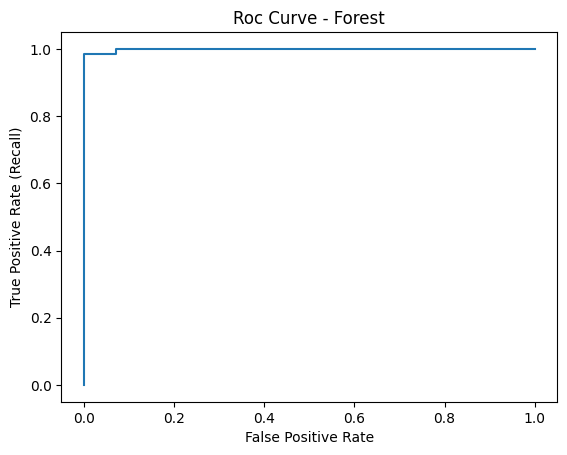

0.9989990705655251

In [68]:

y_probs = forest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# what threshold leads to what kind of fpr o not tpr true positive and false positive. 


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')

plt.title('Roc Curve - Forest')
plt.show()

roc_auc_score(y_test, y_probs)







good performance in 65% in LOG


/home/fabiene/anaconda3/envs/YouTube/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


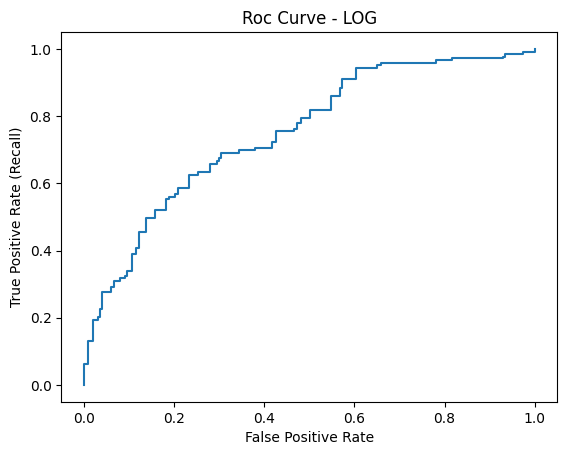

0.7505064226305379

In [67]:
y_probs = log.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# what threshold leads to what kind of fpr o not tpr true positive and false positive. 


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')

plt.title('Roc Curve - LOG')
plt.show()

roc_auc_score(y_test, y_probs)




I want to maximize the recall, but I alos do not want to destroy my precision. Close to forest.

In [73]:
#y_probs = svc.predict_proba(X_test)[:,1] não deu certo


/home/fabiene/anaconda3/envs/YouTube/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


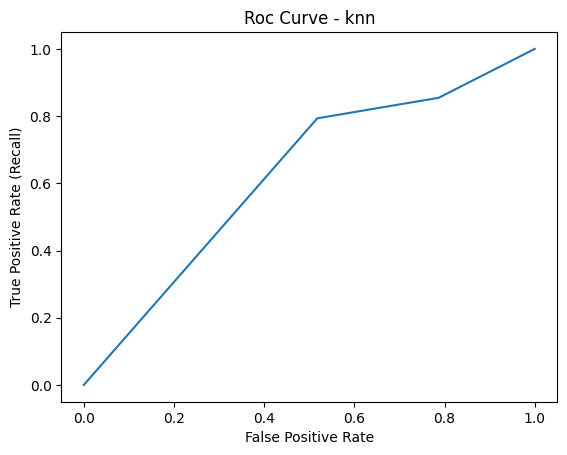

0.624758704511332

In [75]:
y_probs = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# what threshold leads to what kind of fpr o not tpr true positive and false positive. 


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')

plt.title('Roc Curve - knn')
plt.show()

roc_auc_score(y_test, y_probs)




all disease in 20% om gb_Clf

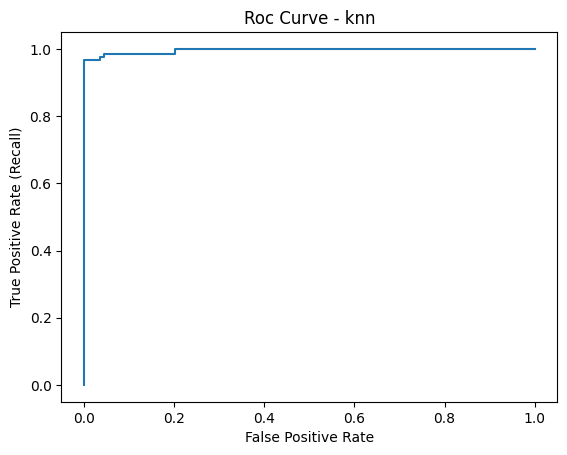

0.996377588713329

In [76]:
y_probs = gb_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# what threshold leads to what kind of fpr o not tpr true positive and false positive. 


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')

plt.title('Roc Curve - knn')
plt.show()

roc_auc_score(y_test, y_probs)




but forest is the best

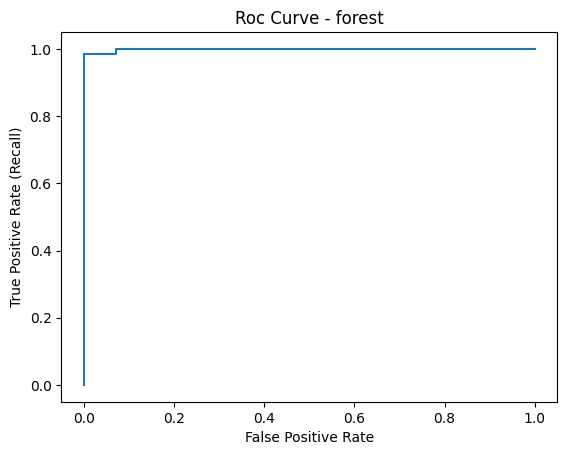

0.9989990705655251

In [77]:
y_probs = forest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# what threshold leads to what kind of fpr o not tpr true positive and false positive. 


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')

plt.title('Roc Curve - forest')
plt.show()

roc_auc_score(y_test, y_probs)



# Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV


param_grid= {

'n_estimators' :[100, 200,500],
'max_depth': [None, 10,20,30],
'min_samples_split' :[2,5,10],
'min_samples_leaf':[1,2,4],
'max_features': ['sqrt', 'log2', None]



}



cv= 3   # want to do three-fold cross validation

treina os 2 campos e valida o último

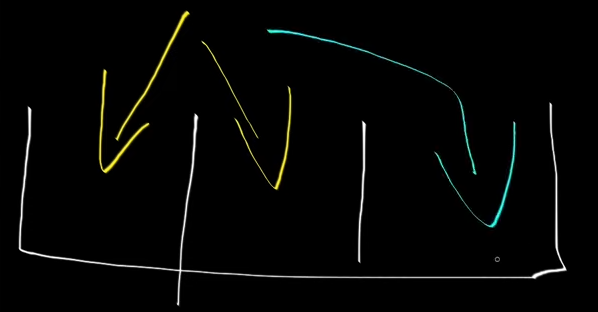

treina os campos em amarelo, final e incial e valida o do meio

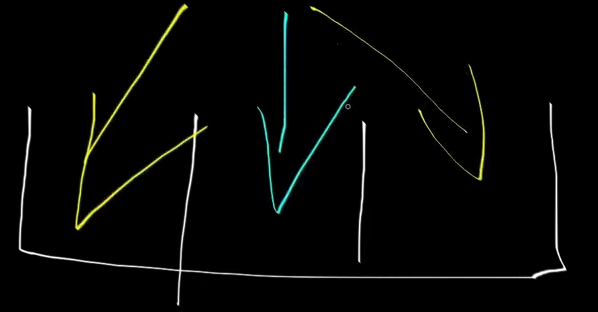


treina os dois últimos e valida o primeiro

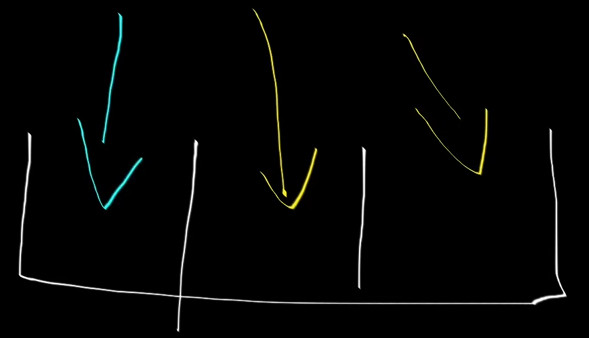

In [81]:
#n_jobs=-1 to parallelize all (random_state =9)

forest = RandomForestClassifier(n_jobs=-1, random_state =9)

#grid_search = GridSearchCV(forest, param_grid,cv=3, n_jobs =-1)

# want to do three-fold cross validation

# I want to parallelize this process as well
#grid_search.fit(X_train,y_train)


In [82]:
#n_jobs=-1 to parallelize all (random_state =9)

forest = RandomForestClassifier(n_jobs=-1, random_state =9)

grid_search = GridSearchCV(forest, param_grid,cv=3, n_jobs =-1, verbose = 2)

# want to do three-fold cross validation

# I want to parallelize this process as well
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_s

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [84]:
3*4*3*3*3

324

In [86]:
(3*4*3*3*3)*3

972

'n_estimators' :[100, 200,500],

'max_depth': [None, 10,20,30],

'min_samples_split' :[2,5,10],

'min_samples_leaf':[1,2,4],

'max_features': ['sqrt', 'log2', None]


= 3 times*4times*3times*3times*3times * 3 cv =972

In [87]:

best_forest = grid_search.best_estimator_

best_forest



RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_featur

In [89]:
from sklearn.model_selection import GridSearchCV


param_grid= {

'n_estimators' :[100, 200,500,600, 700],


}
#n_jobs=-1 to parallelize all (random_state =9)

forest = RandomForestClassifier(n_jobs=-1, random_state =9)

grid_search = GridSearchCV(forest, param_grid,cv=3, n_jobs =-1, verbose = 2)

# want to do three-fold cross validation

# I want to parallelize this process as well
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 500, 600, 700]},
             verbose=2)

## Feature importances

In [90]:

import numpy as np

feature_importances = best_forest.feature_importances_

features = best_forest.feature_names_in_



In [91]:
sorted_idx = np.argsort(feature_importances)

#indices that the whole thing is sorted and then we're going to say, 

sorted_features = features[sorted_idx]

sorted_importances = feature_importances[sorted_idx]

[CV] END ...................................n_estimators=200; total time=   0.6s
[CV] END ...................................n_estimators=200; total time=   0.6s
[CV] END ...................................n_estimators=200; total time=   0.6s
[CV] END ...................................n_estimators=500; total time=   1.2s
[CV] END ...................................n_estimators=500; total time=   1.2s
[CV] END ...................................n_estimators=500; total time=   1.2s
[CV] END ...................................n_estimators=600; total time=   1.4s
[CV] END ...................................n_estimators=600; total time=   1.4s
[CV] END ...................................n_estimators=600; total time=   1.4s
[CV] END ...................................n_estimators=100; total time=   0.4s
[CV] END ...................................n_estimators=700; total time=   1.6s
[CV] END ...................................n_estimators=100; total time=   0.3s
[CV] END ...................

## Answer: the most important feature when it comes to predicting whether someone has a heart disease or not ois the type of chest pain (CP). So not if someone has chest pain, also the maximum heart rate achieved (thalach) and ca (the slope of the peak exercise ST segment)

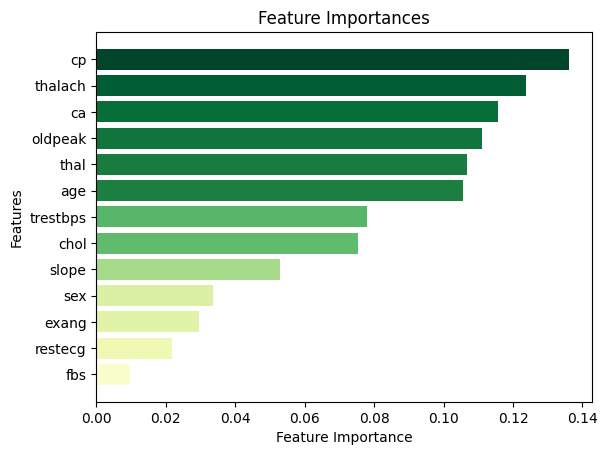

In [92]:

#Yellow and green

colors = plt.cm.YlGn(sorted_importances/max(sorted_importances))


plt.barh(sorted_features, sorted_importances, color= colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## a look at correlations before we do any random forest classification. 

In [93]:
import seaborn as sns


df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

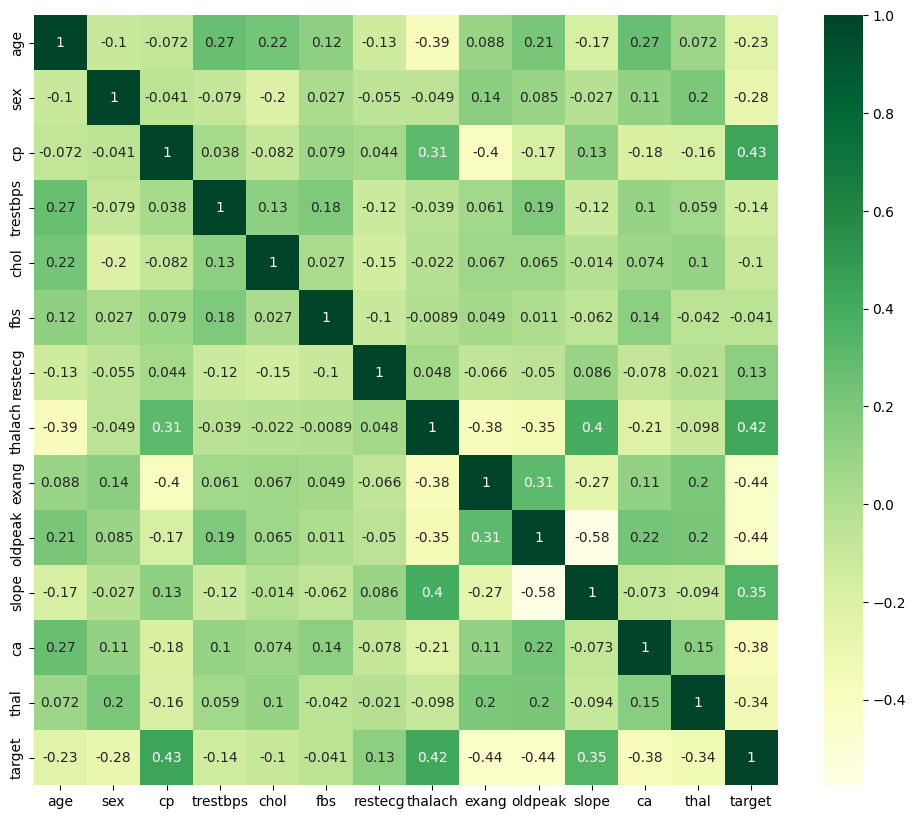

In [94]:

plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGn')

<Axes: >

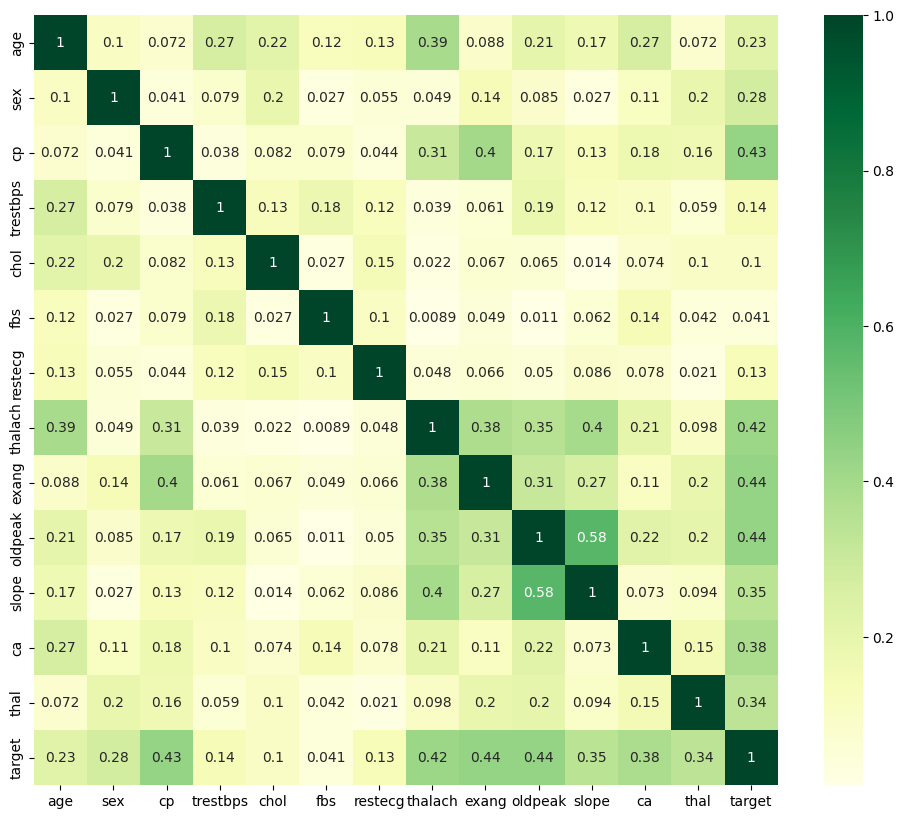

In [95]:
#look only the magnitude


plt.figure(figsize = (12,10))
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGn')

## strongest correlation between the target variable exang (exercise induced angina) and oldpeak (ST depression induced by exercise relative to rest)

maximum heart rate achieved too

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

1 age

2 sex

3 chest pain type (4 values)

4 resting blood pressure

5 serum cholestoral in mg/dl

6 fasting blood sugar > 120 mg/dl

7 resting electrocardiographic results (values 0,1,2)

8 maximum heart rate achieved

9 exercise induced angina

10 oldpeak = ST depression induced by exercise relative to rest

11 the slope of the peak exercise ST segment

12 number of major vessels (0-3) colored by flourosopy

13 thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# correlation doesn't mean that it's necessarily important for the decision making when it comes to classifying whether someone has a heart disease or not. 

In [96]:
best_forest.score(X_test, y_test) 

0.9853658536585366

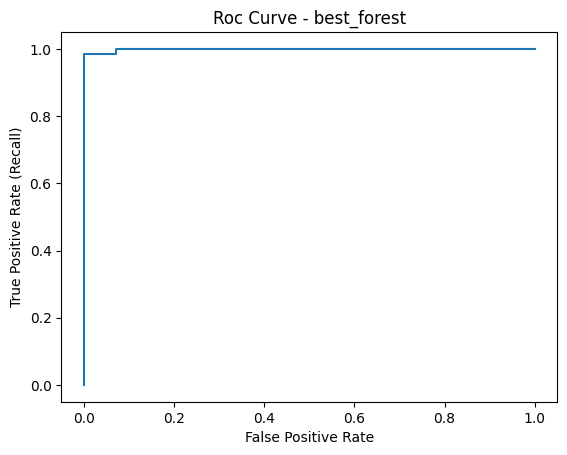

0.9989990705655251

In [97]:
y_probs = best_forest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# what threshold leads to what kind of fpr o not tpr true positive and false positive. 


plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')

plt.title('Roc Curve - best_forest')
plt.show()

roc_auc_score(y_test, y_probs)


In [98]:
y_preds = best_forest.predict(X_test)

print('Best Forest: ', recall_score(y_test, y_preds))

Best Forest:  0.9859154929577465


it has the exact same performance 

In [114]:
#coding tutorial
#probabilidade

#best_forest.predict_proba()

In [112]:
#coding tutorial


#O código que você escreveu treina um RandomForestClassifier com validação cruzada e paralelização total usando n_jobs=-1, que permite que todas as CPUs disponíveis sejam utilizadas.
#n_jobs=-1 to parallelize all (random_state =9)
#forest = RandomForestClassifier(n_jobs=-1, random_state =9)
#grid_search = GridSearchCV(forest, param_grid,cv=3, n_jobs =-1, verbose = 2)
# want to do three-fold cross validation
# I want to parallelize this process as well
#grid_search.fit(X_train,y_train)


best_forest = grid_search.best_estimator_

# Pegando uma única amostra do conjunto de treino
X_sample = X_train.values[0].reshape(1, -1)

# Prevendo as probabilidades
probabilidades = best_forest.predict_proba(X_sample)

print(probabilidades)

[[0.008 0.992]]


/home/fabiene/anaconda3/envs/YouTube/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8% (0.008) de chance de pertencer à classe 0

99.2% (0.992) de chance de pertencer à classe 1

O modelo está quase certo de que essa amostra pertence à classe 1, porque a probabilidade dessa classe é muito maior do que a da classe 0.




In [113]:
print(best_forest.classes_)


[0 1]


onde o :

0 (provavelmente "negativo", "não", saudável)

1 (provavelmente "positivo", "sim", sim doente)

In [116]:
df['target'].unique()

array([0, 1])